# Getting started with OpenAI gym
 
The OpenAI gym environment is one of the most fun ways to get into machine learning. Especially reinforcement learning and neural networks can be applied perfectly to the Atari games collection that is included. As every environment has multiple featured solutions, some with a writeup on how to achieve the same score, you can really improve yourself quickly in a fun way. 
 
I noticed that getting started with Gym can be a bit difficult. Although there are many tutorials for algorithms online, the first step is understanding the programming environment in which you are working. To easy new people into this environment I decided to make a small tutorial with a docker container and a jupyter notebook. 
 
### What you need
Before you get started, install Docker: https://docs.docker.com/engine/installation/#supported-platforms . Docker is a tool that lets you run virtual machines on your computer. I created an "image" that contains several things you want to have: tensorflow, the gym environment, numpy, and some other useful tools. 

After you installed Docker, run the following command to download my prepared docker image: 

```
docker run -p 8888:8888 -p 80:80 -p 5900:5900 -p 15900:15900 -v rmeertens/tensorflowgym
```
 
 
In your browser, navigate to: localhost:8000 and open the OpenAI Universe notebook in the tradr folder.  
 
### Play a game yourself
Let's start by playing the cartpole game ourselves. You control a bar that has a pole on it. The goal of the "game" is to keep the bar upright as long as possible. There are two actions you can perform in this game: give a force to the left, or give a force to the right. To play this game manually, execute the first part of the code. 

By clicking left and right you apply a force, and you see the new state. 


[2017-06-21 13:12:30,748] Making new env: CartPole-v0


<IPython.core.display.Javascript object>


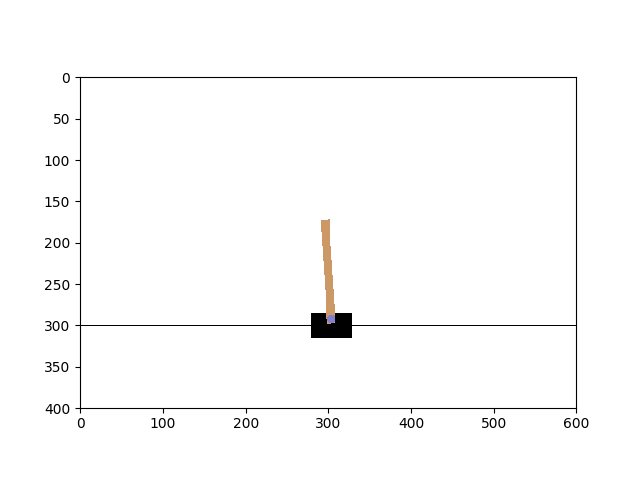

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import widgets
from IPython.display import display

import gym

from matplotlib import animation
from JSAnimation.IPython_display import display_animation



def leftclicked(something):
    """ Apply a force to the left of the cart"""
    onclick(0)

def rightclicked(something):
    """ Apply a force to the right of the cart"""
    onclick(1)
    
def display_buttons():
    """ Display the buttons you can use to apply a force to the cart """
    left = widgets.Button(description="<")
    right = widgets.Button(description=">")
    display(left, right)
    
    left.on_click(leftclicked)
    right.on_click(rightclicked)

# Create the environment and display the initial state
env = gym.make('CartPole-v0')
observation = env.reset()
firstframe = env.render(mode = 'rgb_array')
fig,ax = plt.subplots()
im = ax.imshow(firstframe) 

# Show the buttons to control the cart
display_buttons()


# Function that defines what happens when you click one of the buttons
frames = []
def onclick(action):
    global frames
    observation, reward, done, info = env.step(action)
    frame = env.render(mode = 'rgb_array')
    im.set_data(frame)
    frames.append(frame)

    

### Replay 
Now that you toyed around you probably want to see a replay. Every button click we saved the state of the game, which you can display in your browser: 


<IPython.core.display.Javascript object>


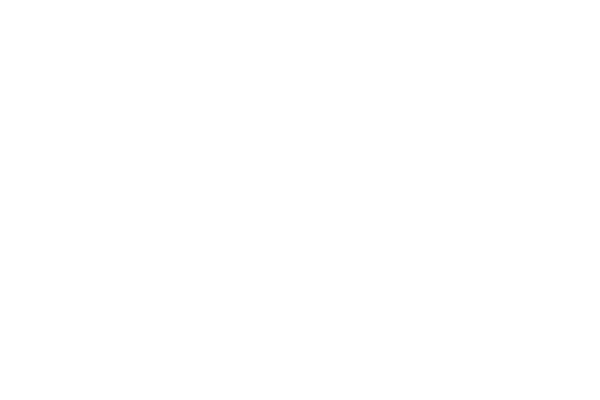


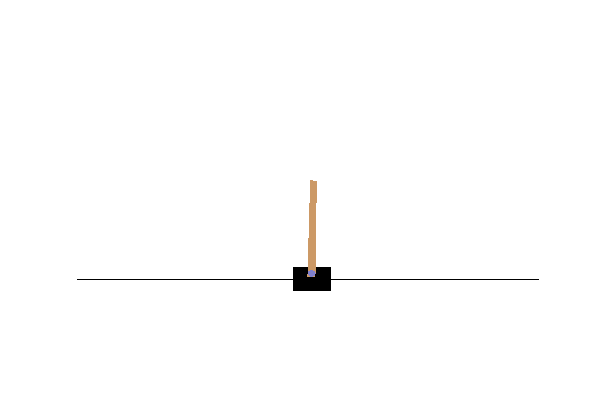
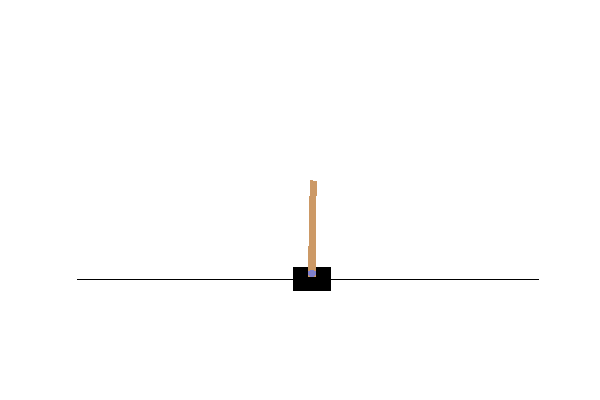
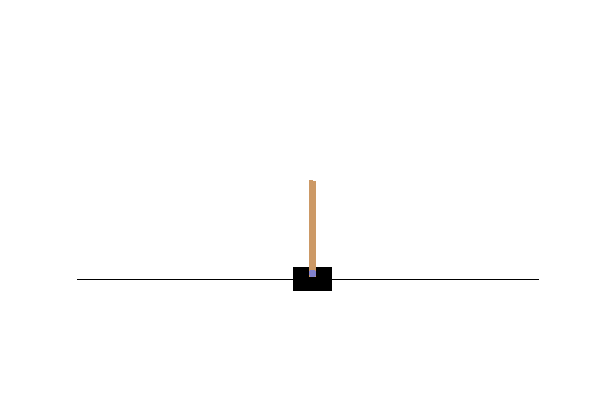
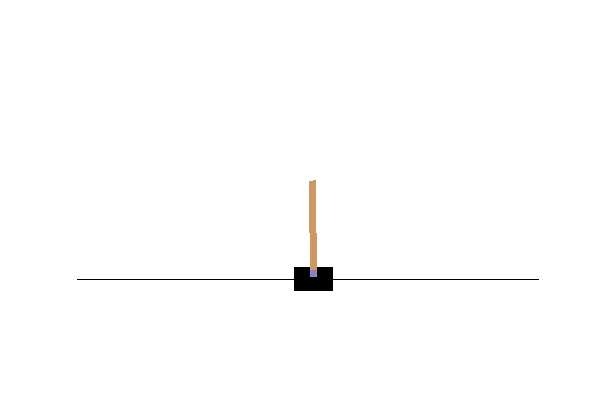
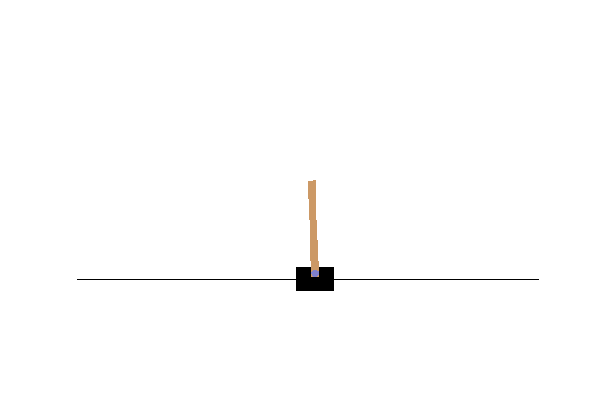
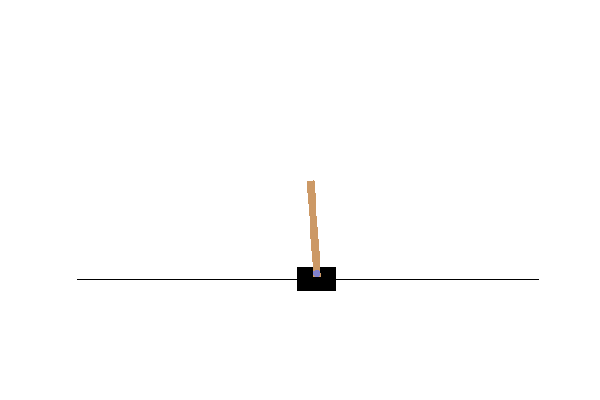
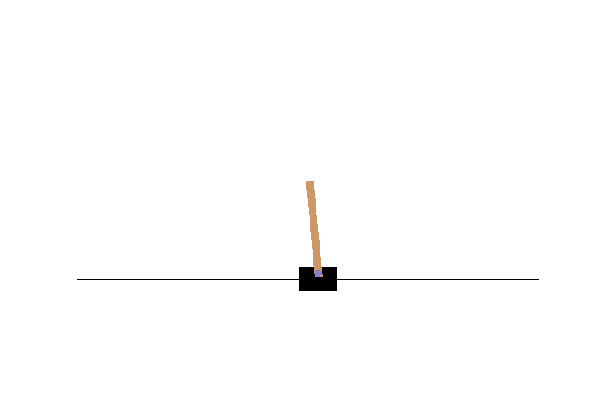
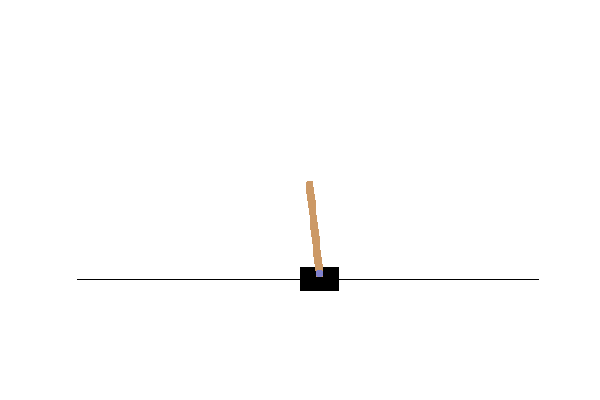
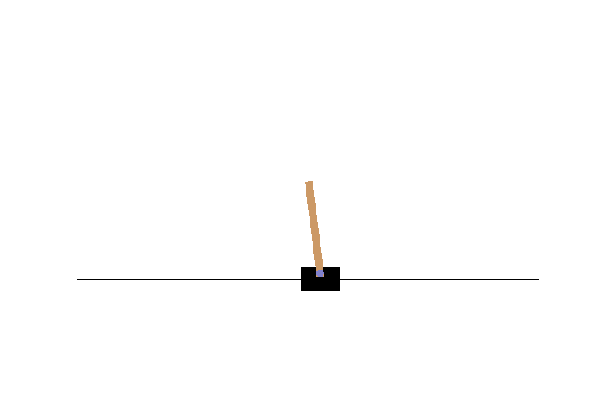
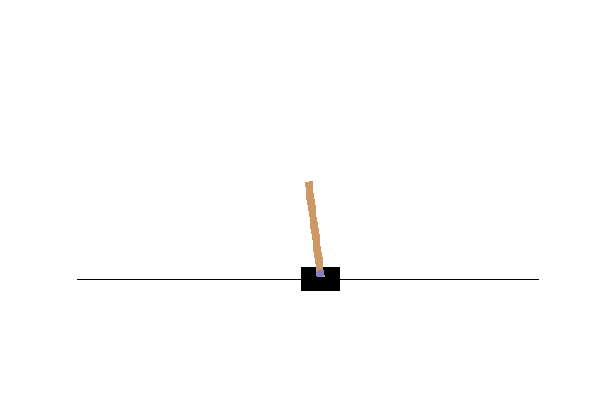
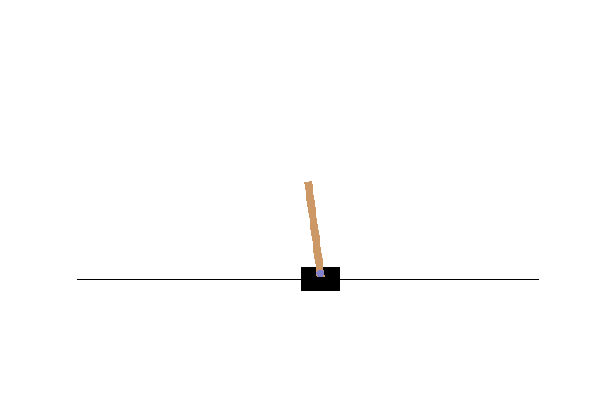
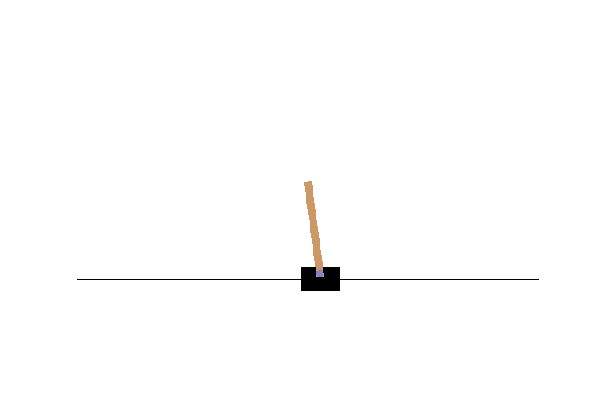
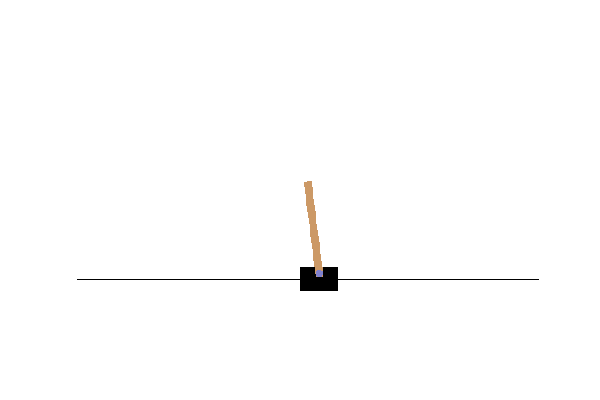
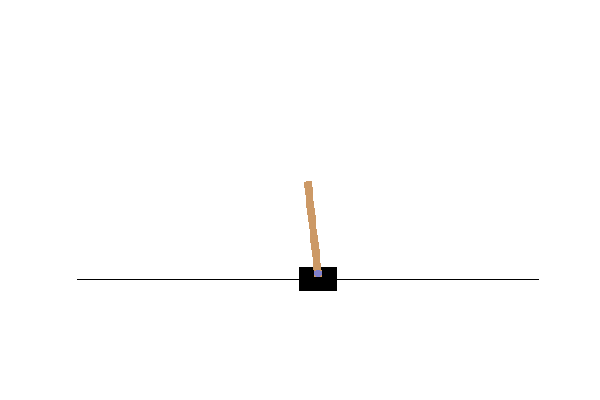
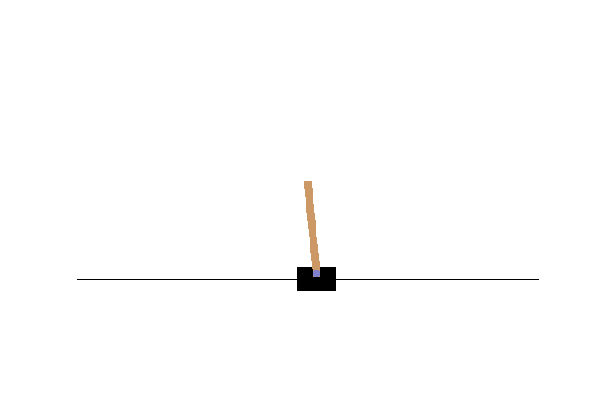
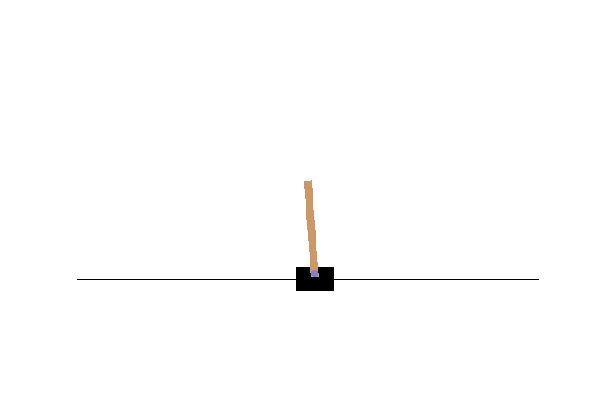
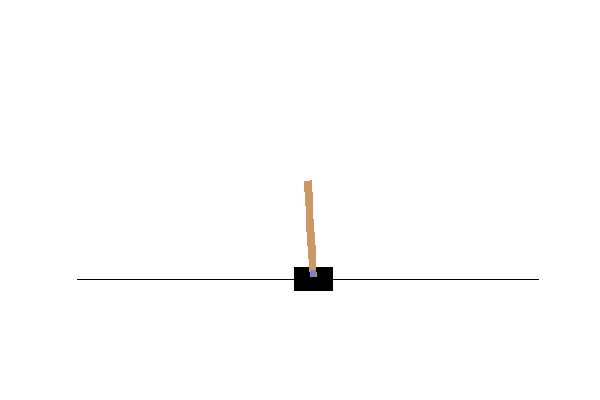
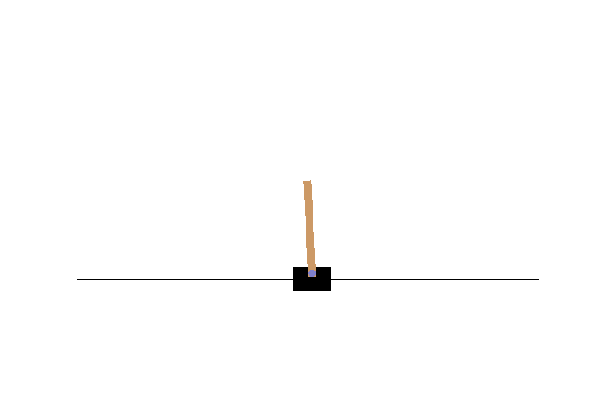
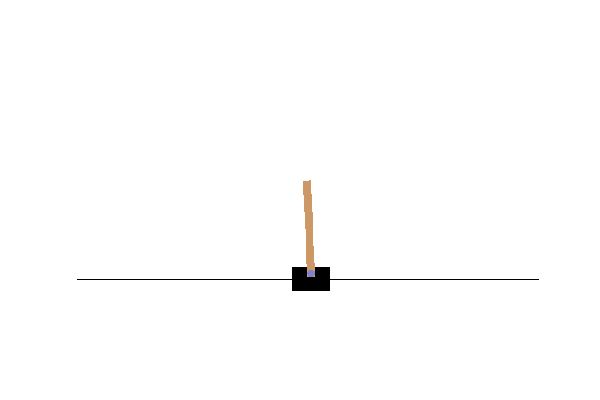
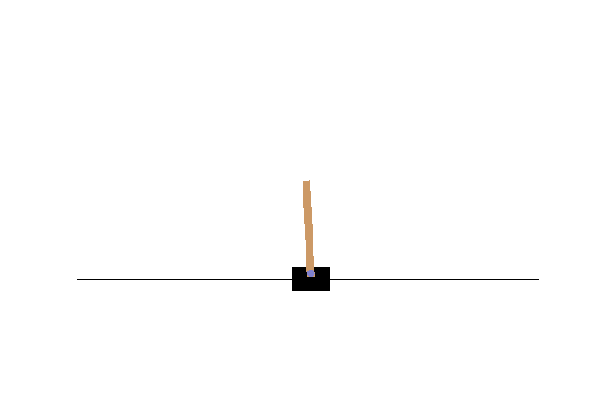
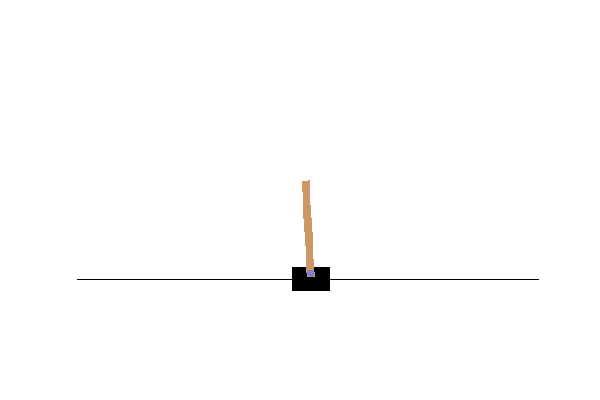

In [2]:
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

display_frames_as_gif(frames)

### Representation
The cardboard environment is described on the [OpenAI website](https://gym.openai.com/envs/CartPole-v0). The values in the observation parameter show the position of the cart and the angle of the pole. If the pole has an angle of more than 15 degrees, or the cart moves more than 2.4 units from the center, the game is "over". 

### Start learning
This blogpost would be incomplete without a simple "learning" mechanism. Kevin Frans made a great blogpost about simple algorithms you can apply on this problem: http://kvfrans.com/simple-algoritms-for-solving-cartpole/. 

The simplest one to implement is his random search algorithm. By multiplying parameters with the observation parameters the cart either decides to apply the force left or right. Now the question is: what are the best parameters? Random search defines them at random, sees how long the cart lasts with those parameters, and remembers the best parameters he found. 


<IPython.core.display.Javascript object>


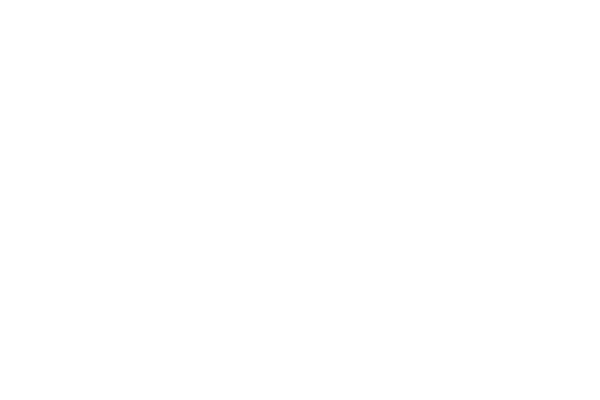


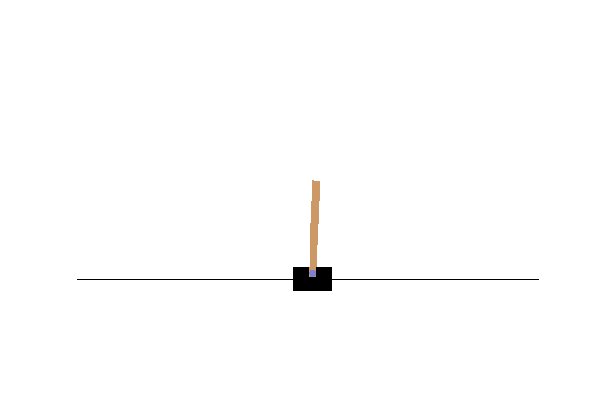
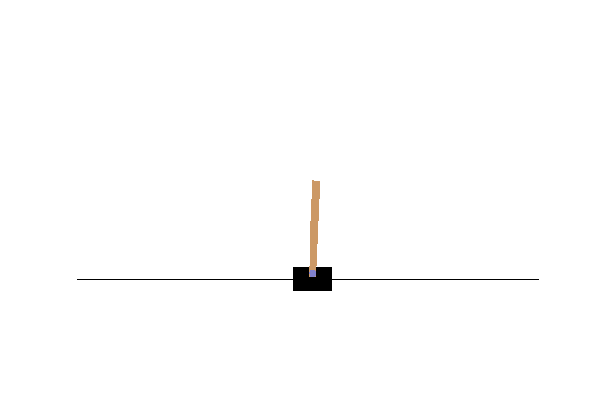
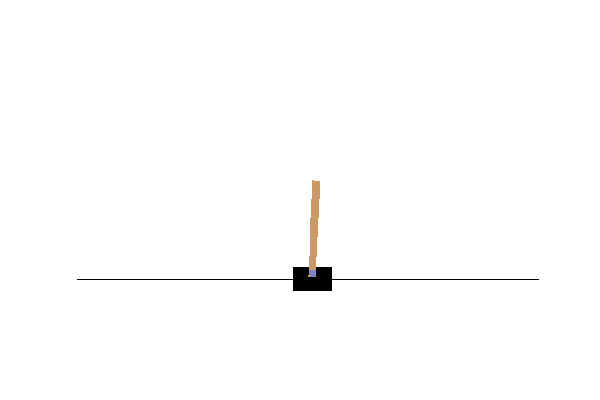
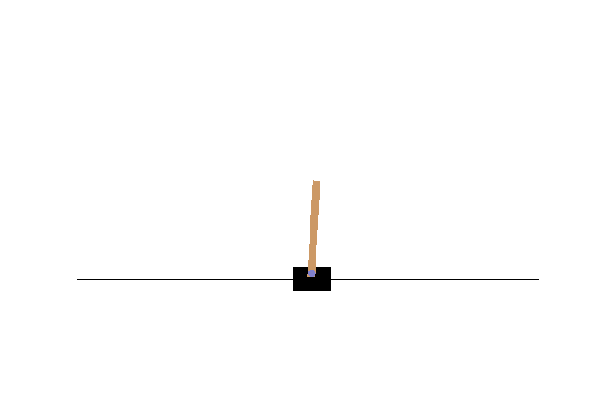
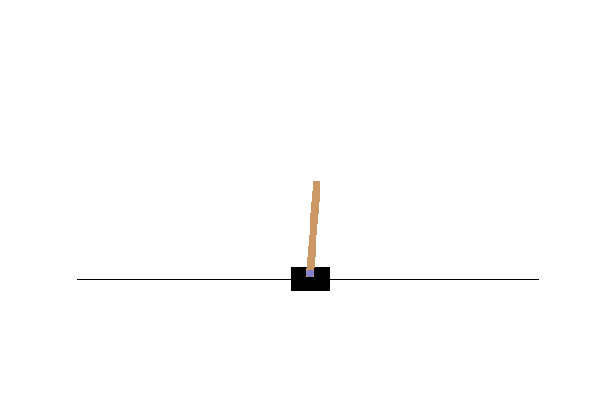
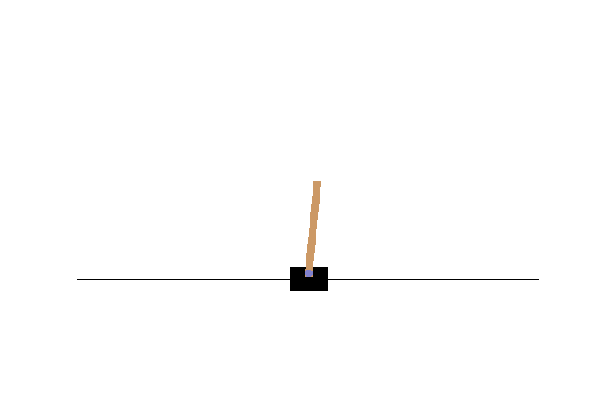
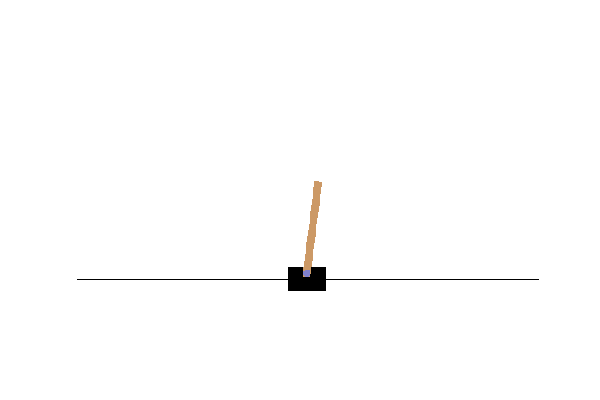
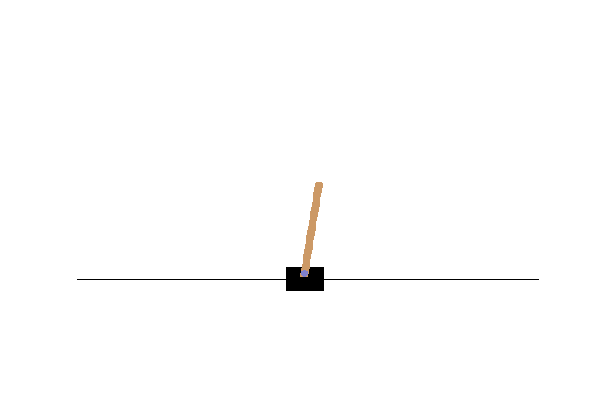
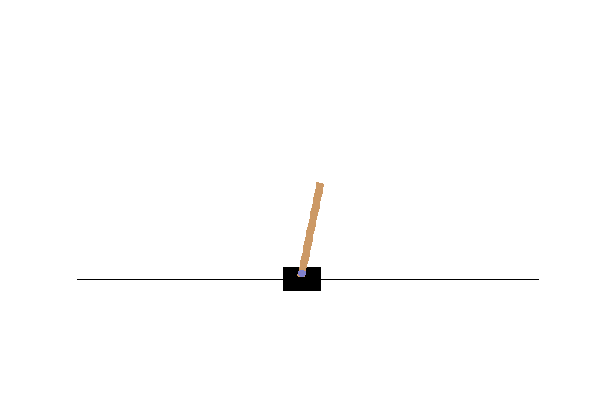
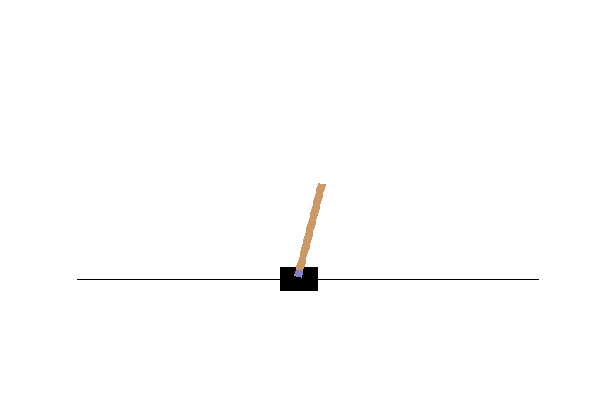

In [4]:


def run_episode(env, parameters):  
    observation = env.reset()
    totalreward = 0
    for _ in xrange(200):
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        totalreward += reward
        if done:
            break
    return totalreward

bestparams = None  
bestreward = 0  
for _ in xrange(10000):  
    parameters = np.random.rand(4) * 2 - 1
    reward = run_episode(env,parameters)
    if reward > bestreward:
        bestreward = reward
        bestparams = parameters
        # considered solved if the agent lasts 200 timesteps
        if reward == 200:
            break
            
def show_episode(env, parameters):  
    observation = env.reset()
    firstframe = env.render(mode = 'rgb_array')
    frames = [firstframe]
    
    for _ in xrange(200):
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        frame = env.render(mode = 'rgb_array')
        frames.append(frame)
        if done:
            break
    return frames

frames = show_episode(env, bestparams)
display_frames_as_gif(frames)

### Conclusion
Congratulations! You made your first autonomous pole-balancer in the OpenAI gym environment. Now that this works it is time to either improve your algorithm, or start playing around with different environments. This Jupyter notebook skips a lot of basic knowledge about what you are actually doing, there is a great writeup about that on the [OpenAI site](https://gym.openai.com/docs).

### Acknowledgments 
This blogpost is the first part of my TRADR summerschool workshop on using human input in reinforcement learning algorithms. More information can be found [on their homepage](https://sites.google.com/view/tradr/home)
